# Vizualizacion  de datos

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

mainPath = "../python-ml-course/datasets"
fileName = "customer-churn-model/Customer Churn Model.txt"

fullPath= os.path.join( mainPath , fileName)
df = pd.read_csv(fullPath)

In [14]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Para que la grafica nos quede en la misma celda

In [16]:
%matplotlib inline

In [9]:
#savefig("path_donde_guardar.jpg")

### Nube de puntos o dispercion scatter plot

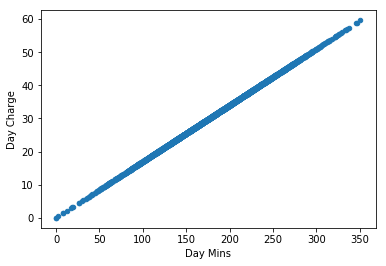

In [10]:
df.plot(kind="scatter", x="Day Mins", y='Day Charge')

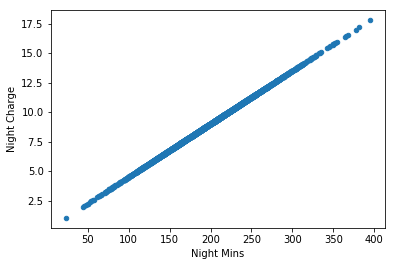

In [12]:
df.plot(kind="scatter", x="Night Mins", y='Night Charge')

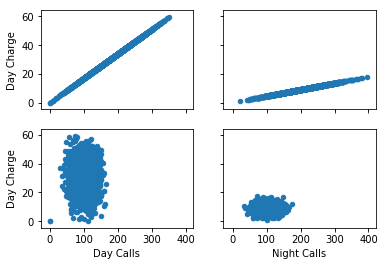

In [28]:
figure, axs = plt.subplots(2,2,sharey=True, sharex=True)
df.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
df.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
df.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
df.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])

##### Histograma:

Text(0.5, 1.0, 'Histograma del numero de llamadas al dia')

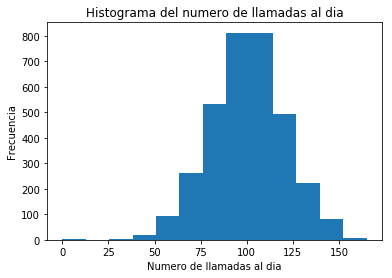

In [41]:
#uso la regla de struggles para calcular las divisiones del histograma los rangos.
k =int( np.ceil(1+np.log2(3333)))
plt.hist(df['Day Calls'], bins=k)
plt.xlabel('Numero de llamadas al dia')
plt.ylabel('Frecuencia')
plt.title('Histograma del numero de llamadas al dia')

#### Diagrama de caja y bigotes


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7604dc6b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7604d53208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7604dc69b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7604d53898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7604d53be0>],
 'means': []}

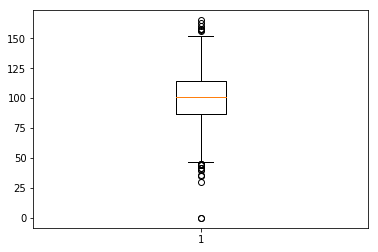

In [43]:
plt.boxplot(df['Day Calls'])

In [5]:
df['Day Calls'].describe()


count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

Rango inter cuartil es 75%-25%= 114-87= 27, si hay valores por debajo de este rango se representan con bolitas como se ve en la grafica. Esto es para los bigotes. Rango inter quartilico IQR.

In [9]:
IQR = df['Day Calls'].quantile(0.75)-df['Day Calls'].quantile(0.25)
IQR

27.0

Bigote inferior calcular valor:

In [12]:
df['Day Calls'].quantile(0.25)-1.5*IQR

46.5

Bigote superior(Observar que esta vez se suma)

In [14]:
df['Day Calls'].quantile(0.75)+1.5*IQR

154.5

Los valores que se salen de los bigotes son outlayer, quiere decir que son valores apaticos con los demas.